## Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a financial model that describes the relationship between the expected return of an asset and its risk, as measured by beta. The CAPM formula is given by:

$$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$

Where:
- $E(R_i)$ is the expected return of the asset
- $R_f$ is the risk-free rate
- $\beta_i$ is the beta of the asset, which measures its sensitivity to market movements
- $E(R_m)$ is the expected return of the market
- $E(R_m) - R_f$ is the market risk premium, which is the additional return expected from investing in the market over the risk-free rate



In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the tickers for Walmart, Stellantis, and the market index
walmart_ticker = "WMT"
stellantis_ticker = "STLA"
market_ticker = "^GSPC"  # S&P 500 index

# Define the date range for the historical data (5 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)  # Approximately 5 years

# Download the historical data
walmart_data = yf.download(walmart_ticker, start=start_date, end=end_date)
stellantis_data = yf.download(stellantis_ticker, start=start_date, end=end_date)
market_data = yf.download(market_ticker, start=start_date, end=end_date)

# Print the first few rows of each dataset to verify
print("Walmart data:")
print(walmart_data.head())
print("\nStellantis data:")
print(stellantis_data.head())
print("\nMarket data:")
print(market_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Walmart data:
Price           Close       High        Low       Open    Volume
Ticker            WMT        WMT        WMT        WMT       WMT
Date                                                            
2020-04-23  39.814861  40.607874  39.567045  40.223758  28839900
2020-04-24  40.096745  40.236139  39.824145  40.068866  17343600
2020-04-27  39.743607  40.366248  39.703335  40.270216  17923800
2020-04-28  39.650677  40.344563  39.557743  39.737410  20732100
2020-04-29  38.287685  38.956788  37.962424  38.897933  44612100

Stellantis data:
Price          Close      High       Low      Open   Volume
Ticker          STLA      STLA      STLA      STLA     STLA
Date                                                       
2020-04-23  5.365231  5.513890  5.317930  5.351717  1990800
2020-04-24  5.405775  5.480104  5.338202  5.473347  1929900
2020-04-27  5.662549  5.669306  5.520647  5.547676  1837600
2020-04-28  5.730121  5.905808  5.682820  5.892294  1798100
2020-04-29  6.034196  6.0477

In [21]:
# Define the parameters
risk_free_rate = 0.0427  # 4.27%
market_risk_premium = 0.055  # 5.5%
 

# Beta values
betaResults = pd.read_csv('Outputs\\beta_results.csv')
walmart_beta = betaResults['Beta'][0]
print(f"Beta for Walmart is: {walmart_beta}")
stellantis_beta = betaResults['Beta'][1]
print(f"Beta for Stellantis is: {stellantis_beta}")

# Calculate expected returns using CAPM formula: E(Ri) = Rf + βi(E(Rm) - Rf)
walmart_expected_return = risk_free_rate + walmart_beta * market_risk_premium
stellantis_expected_return = risk_free_rate + stellantis_beta * market_risk_premium

# Print the calculation steps
print("\nCAPM Formula: E(Ri) = Rf + βi(E(Rm) - Rf)")
print(f"Risk-free rate (Rf): {risk_free_rate:.4f}")
print(f"Market risk premium (E(Rm) - Rf): {market_risk_premium:.4f}")
print("\nWalmart CAPM Calculation:")
print(f"E(Ri) = {risk_free_rate:.4f} + {walmart_beta:.4f} × {market_risk_premium:.4f}")
print(f"E(Ri) = {risk_free_rate:.4f} + {walmart_beta * market_risk_premium:.4f}")
print(f"E(Ri) = {walmart_expected_return:.4f} or {walmart_expected_return * 100:.2f}%")

print("\nStellantis CAPM Calculation:")
print(f"E(Ri) = {risk_free_rate:.4f} + {stellantis_beta:.4f} × {market_risk_premium:.4f}")
print(f"E(Ri) = {risk_free_rate:.4f} + {stellantis_beta * market_risk_premium:.4f}")
print(f"E(Ri) = {stellantis_expected_return:.4f} or {stellantis_expected_return * 100:.2f}%")

Beta for Walmart is: 0.6932705680967155
Beta for Stellantis is: 1.5000000000000002

CAPM Formula: E(Ri) = Rf + βi(E(Rm) - Rf)
Risk-free rate (Rf): 0.0427
Market risk premium (E(Rm) - Rf): 0.0550

Walmart CAPM Calculation:
E(Ri) = 0.0427 + 0.6933 × 0.0550
E(Ri) = 0.0427 + 0.0381
E(Ri) = 0.0808 or 8.08%

Stellantis CAPM Calculation:
E(Ri) = 0.0427 + 1.5000 × 0.0550
E(Ri) = 0.0427 + 0.0825
E(Ri) = 0.1252 or 12.52%



Number of common dates: 59


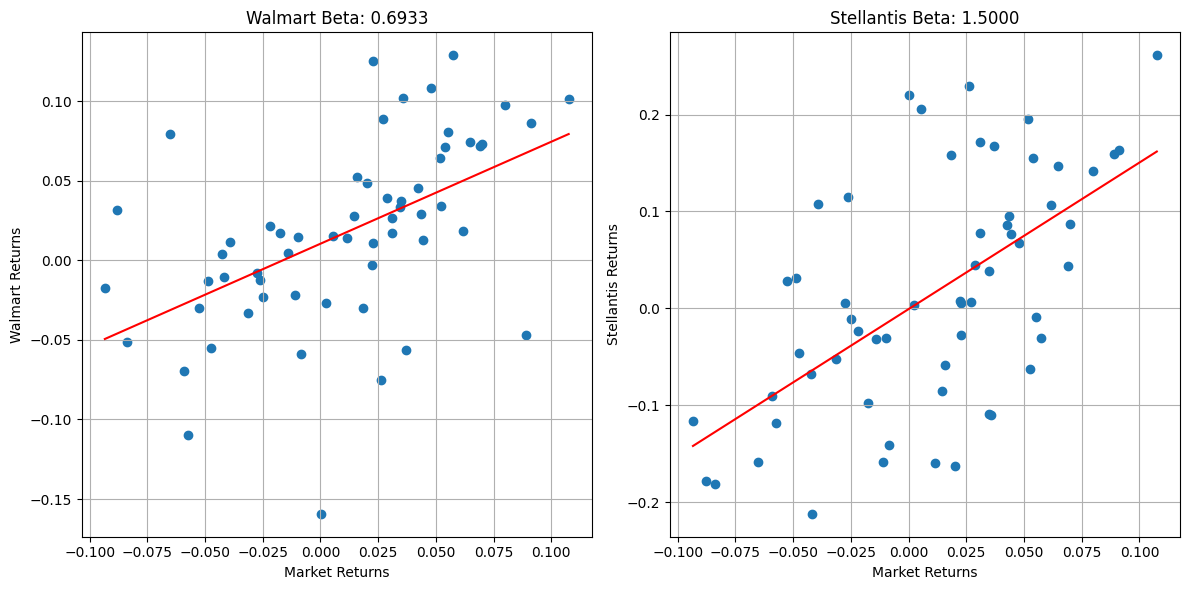

In [22]:
# Create a DataFrame with a common index
common_dates = walmart_returns.index.intersection(
    stellantis_returns.index.intersection(market_returns.index)
)
print(f"\nNumber of common dates: {len(common_dates)}")

returns_df = pd.DataFrame(index=common_dates)
returns_df['Walmart'] = walmart_returns.loc[common_dates]
returns_df['Stellantis'] = stellantis_returns.loc[common_dates]
returns_df['Market'] = market_returns.loc[common_dates]


# Visualize the stock returns vs market returns to see the beta relationship
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(returns_df['Market'], returns_df['Walmart'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Walmart'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Walmart Returns')
plt.title(f'Walmart Beta: {walmart_beta:.4f}')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(returns_df['Market'], returns_df['Stellantis'])
plt.plot(np.unique(returns_df['Market']), 
         np.poly1d(np.polyfit(returns_df['Market'], returns_df['Stellantis'], 1))(np.unique(returns_df['Market'])), 
         color='red')
plt.xlabel('Market Returns')
plt.ylabel('Stellantis Returns')
plt.title(f'Stellantis Beta: {stellantis_beta:.4f}')
plt.grid(True)

plt.tight_layout()
plt.savefig('stock_betas.png')
plt.show()


## 📉 Visual Interpretation of Beta: Walmart vs. Stellantis

The scatter plots above illustrate the **relationship between individual stock returns and market returns**, with the red line representing the **line of best fit** — essentially the **beta coefficient**.

### Walmart (Left Plot):
- The **beta is 0.6933**, as shown by the moderate slope of the trendline.
- This indicates **less sensitivity to market movements** — Walmart’s returns move **less than the market’s returns**.
- The data points are relatively clustered around the trendline, suggesting **stable and predictable performance**, typical of a **defensive stock** in consumer staples.

### Stellantis (Right Plot):
- The **beta is 1.5000**, reflected by the steeper slope.
- This shows **higher sensitivity to market changes** — when the market rises or falls, Stellantis tends to move **more aggressively in the same direction**.
- The spread of data points around the line is wider, reflecting **greater volatility**, which aligns with Stellantis being in the **cyclical automotive industry**.

### Summary:
- The visual evidence reinforces the CAPM calculations: **Walmart** is lower-risk with more stable returns, while **Stellantis** offers higher expected returns but at the cost of increased risk and volatility.


In [23]:

# Additionally, we can calculate R-squared to measure how well the market explains the stock variations
from scipy import stats

# For Walmart
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Walmart'])
walmart_rsquared = r_value**2

# For Stellantis
slope, intercept, r_value, p_value, std_err = stats.linregress(returns_df['Market'], returns_df['Stellantis'])
stellantis_rsquared = r_value**2

print(f"\nWalmart R-squared: {walmart_rsquared:.4f}")
print(f"Stellantis R-squared: {stellantis_rsquared:.4f}")

# Add a section to calculate the CAPM in tabular format
capm_data = {
    'Company': ['Walmart', 'Stellantis'],
    'Beta': [walmart_beta, stellantis_beta],
    'Risk-Free Rate': [risk_free_rate, risk_free_rate],
    'Market Risk Premium': [market_risk_premium, market_risk_premium],
    'Cost of Equity (CAPM)': [walmart_expected_return, stellantis_expected_return]
}

capm_df = pd.DataFrame(capm_data)
print("\nCAPM Results:")
print(capm_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


Walmart R-squared: 0.2754
Stellantis R-squared: 0.3540

CAPM Results:
   Company   Beta  Risk-Free Rate  Market Risk Premium  Cost of Equity (CAPM)
   Walmart 0.6933          0.0427               0.0550                 0.0808
Stellantis 1.5000          0.0427               0.0550                 0.1252


## 📊 R-Squared Analysis: Walmart vs. Stellantis

**R-squared (R²)**, also known as the **coefficient of determination**, measures how well the variability of a stock’s returns is explained by the market's returns in a linear regression. It ranges from **0 to 1**, where:

- **0** = No explanatory power (the model explains none of the variability)
- **1** = Perfect fit (the model explains all of the variability)

---

### Walmart R²: **0.2754**
- Approximately **27.54%** of Walmart’s return variability is explained by market returns.
- This relatively low R² is **typical for defensive stocks**, which are influenced more by **company-specific factors** (e.g., stable demand, internal operations) than market-wide movements.
- Interpretation: While Walmart does respond to market trends, a significant portion of its performance is **independent of broader market fluctuations**.

---

### Stellantis R²: **0.3540**
- About **35.40%** of Stellantis’s return variability is explained by the market.
- This is a **moderately stronger relationship** compared to Walmart, which makes sense given Stellantis’s **higher beta** and exposure to **cyclical economic factors**.
- Interpretation: Stellantis’s performance is **more tightly linked to overall market performance**, but there’s still **substantial influence from firm-specific and industry-specific events**.

---

### 🔍 Key Insight:
- Neither stock has a very high R², which suggests **diversification value** — these companies may behave **differently from the market**, especially Walmart.
- A **low to moderate R²** does **not invalidate the CAPM**, but highlights the **importance of non-market risks** (unsystematic risk) in driving returns.

Use R² in tandem with **beta**:  
- **Beta** measures **sensitivity** to market movements.  
- **R²** tells you how well those movements **explain** the stock’s behavior.


## CAPM Analysis: Walmart vs. Stellantis

### 📊 Input Summary
- **Risk-Free Rate (Rf)**: 4.27%
- **Market Risk Premium=**: 5.50%
- **Expected Market Return (E(Rm))**: 9.77%
- **Beta (Walmart)**: 0.6933
- **Beta (Stellantis)**: 1.5000

---

### 📈 Expected Returns (CAPM Results)

#### Walmart:
We use the CAPM formula:
$$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$

Walmart CAPM Calculation:
$$ E(R_{\text{Walmart}}) = 0.0427 + 0.6933 \cdot 0.0550 $$
$$ E(R_{\text{Walmart}}) = 0.0427 + 0.0381 = 0.0808 \Rightarrow \textbf{8.08\%} $$


---

#### Stellantis:
Applying the same CAPM formula:
Stellantis CAPM Calculation:
$$ E(R_{\text{Stellantis}}) = 0.0427 + 1.5000 \cdot 0.0550 $$
$$ E(R_{\text{Stellantis}}) = 0.0427 + 0.0825 = 0.1252 \Rightarrow \textbf{12.52\%} $$

---

### 🧠 Interpretation of Results

- **Walmart's Beta** is **below 1 (0.6933)**, which implies it is **less volatile** than the market. This suggests it is a **defensive stock**, offering relatively **stable and lower-risk returns**. Consequently, its expected return (8.08%) is **lower**.

- **Stellantis's Beta** is **above 1 (1.5000)**, indicating it is **more volatile** than the market. It is a **cyclical stock**, expected to **outperform in bull markets but underperform in bear markets**. The higher risk translates into a **higher expected return** (12.52%).

- **Risk vs. Return Trade-off**: CAPM quantifies the trade-off between risk and return. Higher beta stocks like Stellantis offer **higher potential returns** to compensate for their **higher risk**, while lower beta stocks like Walmart are **safer investments** with **moderate returns**.

---

### ✅ Key Takeaways

- **Walmart** is suitable for **risk-averse investors** seeking **steady returns** with low market sensitivity.
- **Stellantis** may attract **risk-tolerant investors** aiming for **higher gains** in exchange for greater volatility.
- CAPM provides a clear, quantitative way to compare investment opportunities based on their **systematic risk exposure**.

---

### 💡 Strategic Insight
In portfolio construction:
- Including **Walmart** could provide **stability** during downturns.
- Adding **Stellantis** could enhance **returns** during economic expansions — but it requires active **risk management**.

Use CAPM as a **baseline tool**, and always combine it with **qualitative factors**, such as industry trends, management quality, and macroeconomic indicators, for holistic decision-making.
